## DIGHUM 101 Individual Project - Brendon Lin

For this project, I’d like to take a look at how the COVID-19 pandemic affected how people around the world changed their behaviors in response to the lockdown procedures put in place by the governments worldwide. Due to differences in culture, resources, and connections to the outside world, the response to the pandemic has varied greatly. The advent of the internet kept people connected in a world of social distancing. Remote work utilizing Zoom or Google Meet became the norm, and the term  “work from home” joined peoples’ daily vocabulary around the world. However, having to suddenly change lifestyles is quite difficult, and not everyone will be able to adapt quickly and easily. Mental health worldwide suffered, and being able to get the resources that people needed became quite difficult, especially with many of them only being available remotely. Frustration towards how long the lockdown lasted as well as not having good news for months absolutely took a toll on hope. This kind of worldwide tragedy is truly a once in a lifetime event, which is why as survivors, we have the responsibility of using hindsight and data so that we are more prepared if a similar event were ever to happen again in the future.  

My research question is: As the pandemic continued longer and longer, how did attitudes towards self-isolation and social distancing change around the world?

The data was found from CORGIS, a database of datasets that can be be explored freely! It is a YouGov dataset that took monthly surveys from people around the world asking questions related to COVID behaviors, for sentimental questions ranking from 0-100 and numberical questions staying as numbers.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('covid-behavior-tracker.csv')
data

,Country,Days since outbreak,Counts.Household contacts,Counts.Total contacts,Counts.Times left home,Counts.Handwashes,Scores.Isolate.Willingness if symptoms,Scores.Isolate.Willingness if advised,Scores.Isolate.Difficulty,Scores.Masks.Outside home,...,Scores.Avoidance.Gatherings.Medium,Scores.Avoidance.Gatherings.Large,Scores.Avoidance.Crowded areas,Scores.Avoidance.Shops,Scores.Precautions.Cleaned surfaces,Scores.Precautions.Covered mouth sneeze,Scores.Precautions.Used hand sanitiser,Scores.Outlooks.Covid is dangerous,Scores.Outlooks.Likely to get covid,Scores.Outlooks.Life greatly impacted
0,Australia,85,2.0,8.2,1.0,11.5,85.8,14.3,91.9,23.9,...,90.9,92.7,89.8,60.2,64.4,91.8,72.9,0.0,0.0,0.0
1,Australia,115,2.3,8.0,1.1,10.3,83.0,13.6,90.3,24.1,...,84.3,89.2,84.7,53.8,60.6,90.3,75.1,0.0,0.0,0.0
2,Australia,146,2.5,14.3,1.3,9.6,80.8,13.9,89.3,22.2,...,63.8,76.1,75.7,40.4,57.4,90.6,77.0,49.2,18.9,46.1
3,Australia,176,2.4,13.0,1.4,10.5,83.7,14.0,90.5,24.9,...,64.4,76.4,77.5,40.5,57.9,91.2,81.2,55.7,24.6,49.2
4,Australia,207,2.5,14.4,1.3,10.2,84.2,13.8,90.7,49.5,...,67.3,76.7,77.5,44.1,59.1,92.8,80.9,54.0,20.7,52.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Vietnam,115,4.3,29.9,3.0,8.7,56.2,7.1,89.0,91.7,...,69.4,75.5,78.6,51.0,77.9,90.7,83.1,0.0,0.0,0.0
287,Vietnam,146,5.9,36.7,3.3,8.7,57.1,6.5,89.8,91.6,...,62.5,69.4,72.2,48.1,77.7,90.9,81.7,73.8,25.7,56.7
288,Vietnam,176,5.5,33.1,3.5,7.8,57.1,6.9,88.8,91.0,...,60.8,65.4,69.1,45.6,78.0,89.3,81.6,74.2,26.6,58.6
289,Vietnam,207,6.4,26.7,2.6,9.3,64.9,6.3,90.9,94.6,...,76.1,82.1,85.8,58.7,81.3,93.5,86.4,79.8,29.0,67.7


Let's group by country and time.

In [58]:
sorted_data = data.groupby(['Country', 'Days since outbreak']).apply(lambda x:x.sort_values(by='Days since outbreak')).reset_index(drop=True)

Let's take Australia as an example, let's see the trends of how the mindset of willingness to isolate if symptoms were to occur.

Text(0, 0.5, 'Isolation Willingness Score (from 0-100)')

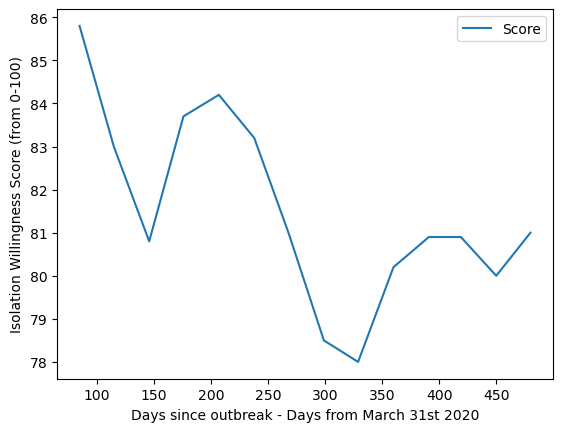

In [39]:
australia = sorted_data[sorted_data['Country'] == 'Australia']
australia_graph = australia.plot.line(x='Days since outbreak', y='Scores.Isolate.Willingness if symptoms', label='Score')
australia_graph.set_xlabel("Days since outbreak - Days from March 31st 2020")
australia_graph.set_ylabel("Isolation Willingness Score (from 0-100)")


We can compare this to actual case numbers and articles from during that point in time. There is a peak in the graph around 200 days, which is October 2020, in which there were 27,582 confirmed cases in Australia. (source: Department of Health and Aged Care) At the lowest, which was around 325 days, which is February 2021, cases were 28,826 confirmed cases. This means that were only 1244 new cases between that time period, and with numbers that low, it's not suprising that the willingness to isolate was declining so much. 

As another example, let's take a look at Italy and compare.

Text(0, 0.5, 'Isolation Willingness Score (from 0-100)')

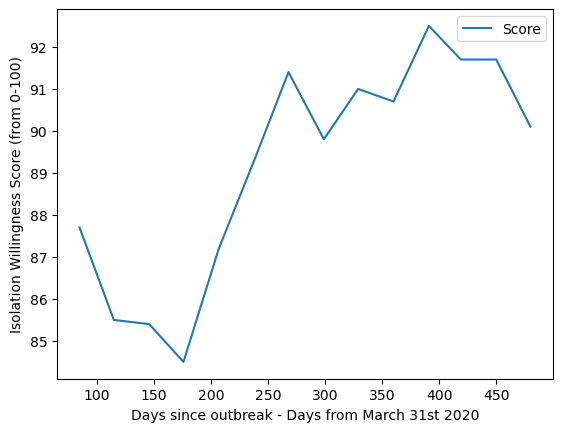

In [50]:
italy = sorted_data[sorted_data['Country'] == 'Italy']
italy_graph = italy.plot.line(x='Days since outbreak', y='Scores.Isolate.Willingness if symptoms', label='Score')
italy_graph.set_xlabel("Days since outbreak - Days from March 31st 2020")
italy_graph.set_ylabel("Isolation Willingness Score (from 0-100)")


In a similar vein, there was a spike in isolation willingness from October 2020 to December 2020. In October 2020, there were 100,446 confirmed cases. (source: Italian Ministry of Health) In December 2020, there were over 1,601,554 cases. Understandably, rising cases at this level would cause people to be more willing to isolate.

Now that we understand how we can analyze the graph, we can start looking at potential factors. One important one that many people point to is wealth. Do countries with higher GDPs have a higher willingness to wear masks? For this, let's compare Japan, the country with the 3rd highest GDP and Finland, the 47th highest GDP.

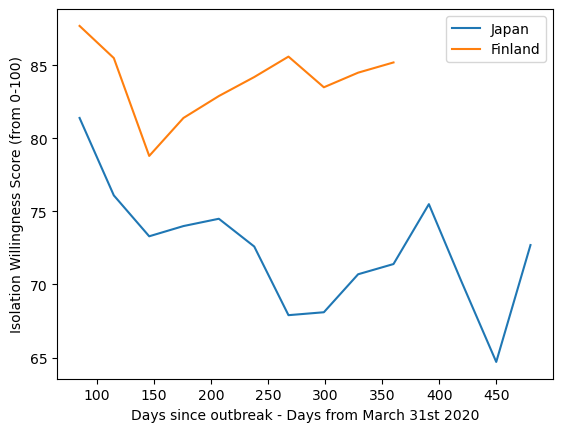

In [102]:
japan = sorted_data[sorted_data['Country'] == 'Japan']
finland = sorted_data[sorted_data['Country'] == 'Finland']

figure, comparison = plt.subplots()
comparison.plot(japan['Days since outbreak'], japan['Scores.Isolate.Willingness if symptoms'], label='Japan')
comparison.plot(finland['Days since outbreak'], finland['Scores.Isolate.Willingness if symptoms'], label='Finland')
comparison.set_xlabel("Days since outbreak - Days from March 31st 2020")
comparison.set_ylabel("Isolation Willingness Score (from 0-100)")
comparison.legend()


As you can see, it looks like the dataset for Finland cuts off around 350 days (most likely 365 days so was only able to gather a year's worth of data.) However, even just looking at the trend of the score of the year, it follows a very similar pattern, which leads me to believe that GDP isn't that big of a factor. (though to be extremely sure, requires much more countries and comparisons)

Next up, let's look at a potential cultural factor. In East Asian countries, wearing a mask when one is sick is quite normalized, whereas in Western countries it's rare to wear a mask outside of hospital contexts. For this, we will use Japan, Vietnam, South Korea, United States, Germany, and France. 

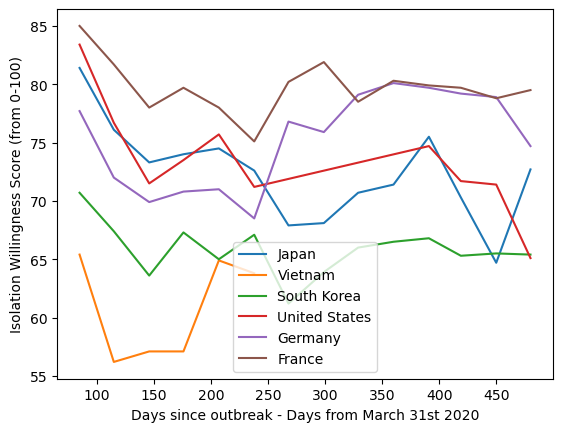

In [135]:
vietnam = sorted_data[sorted_data['Country'] == 'Vietnam']
south_korea = sorted_data[sorted_data['Country'] == 'South Korea']
united_states = sorted_data[sorted_data['Country'] == 'United States']
germany = sorted_data[sorted_data['Country'] == 'Germany']
france = sorted_data[sorted_data['Country'] == 'France']

figure2, comparison2 = plt.subplots()
comparison2.plot(japan['Days since outbreak'], japan['Scores.Isolate.Willingness if symptoms'], label='Japan')
comparison2.plot(vietnam['Days since outbreak'], vietnam['Scores.Isolate.Willingness if symptoms'], label='Vietnam')
comparison2.plot(south_korea['Days since outbreak'], south_korea['Scores.Isolate.Willingness if symptoms'], label='South Korea')
comparison2.plot(united_states['Days since outbreak'], united_states['Scores.Isolate.Willingness if symptoms'], label='United States')
comparison2.plot(germany['Days since outbreak'], germany['Scores.Isolate.Willingness if symptoms'], label='Germany')
comparison2.plot(france['Days since outbreak'], france['Scores.Isolate.Willingness if symptoms'], label='France')
comparison2.set_xlabel("Days since outbreak - Days from March 31st 2020")
comparison2.set_ylabel("Isolation Willingness Score (from 0-100)")
comparison2.legend()


The results are quite interesting. The trends of Japan and South Korea is quite similar, while Vietnam's appears to different (although the data cuts out after around 200 days). Germany and France's trends also appear to be quite similar, and so do Japan and South Korea's. The United States follows a similar overall trend most closely to Japan, but is a bit of outlier. The result could also be because of geographical proximity, as Japan and South Korea are quite close to each other, and so it Germany and France. But the United States is thousands of miles away from both sides of the globe. Once again, this is not enough data to make a full conclusion, but is a starting point that can be explored further. 

if given more time, it might be intresting to try and incorporate more elements through the use of correlation, as the dataset has an incredibly huge amount of questions that the respondents answered. For potentail future reference, this is the correlation table for Australia.

In [149]:
australia.drop('Country', axis=1).corr()

,Days since outbreak,Counts.Household contacts,Counts.Total contacts,Counts.Times left home,Counts.Handwashes,Scores.Isolate.Willingness if symptoms,Scores.Isolate.Willingness if advised,Scores.Isolate.Difficulty,Scores.Masks.Outside home,Scores.Masks.Grocery store,...,Scores.Avoidance.Gatherings.Medium,Scores.Avoidance.Gatherings.Large,Scores.Avoidance.Crowded areas,Scores.Avoidance.Shops,Scores.Precautions.Cleaned surfaces,Scores.Precautions.Covered mouth sneeze,Scores.Precautions.Used hand sanitiser,Scores.Outlooks.Covid is dangerous,Scores.Outlooks.Likely to get covid,Scores.Outlooks.Life greatly impacted
Days since outbreak,1.000000,0.313408,0.982397,0.899944,-0.343475,-0.638760,0.441023,-0.787910,0.558394,0.631085,...,-0.925207,-0.963483,-0.966370,-0.894874,-0.865263,-0.569816,-0.021953,0.499364,0.598586,0.437285
Counts.Household contacts,0.313408,1.000000,0.363541,0.425148,-0.727952,-0.491378,0.134092,-0.492978,0.022658,0.134437,...,-0.412003,-0.418643,-0.420576,-0.432884,-0.117270,-0.202863,0.025249,0.272739,0.361244,0.282286
Counts.Total contacts,0.982397,0.363541,1.000000,0.925991,-0.388350,-0.650651,0.392344,-0.800776,0.508622,0.612168,...,-0.940181,-0.970730,-0.973296,-0.912333,-0.839666,-0.525478,-0.022362,0.554407,0.661987,0.503630
Counts.Times left home,0.899944,0.425148,0.925991,1.000000,-0.552513,-0.630400,0.356707,-0.851058,0.518958,0.678538,...,-0.953388,-0.936476,-0.929850,-0.950049,-0.722044,-0.460042,0.206869,0.715128,0.818965,0.680115
Counts.Handwashes,-0.343475,-0.727952,-0.388350,-0.552513,1.000000,0.522978,-0.227771,0.743132,-0.179190,-0.313991,...,0.537281,0.494640,0.513115,0.582048,0.103376,0.375162,-0.080027,-0.438778,-0.462715,-0.460145
Scores.Isolate.Willingness if symptoms,-0.638760,-0.491378,-0.650651,-0.630400,0.522978,1.000000,-0.610842,0.679195,-0.375446,-0.508861,...,0.763203,0.734857,0.717667,0.798341,0.387620,0.456850,-0.192330,-0.473144,-0.461330,-0.401925
Scores.Isolate.Willingness if advised,0.441023,0.134092,0.392344,0.356707,-0.227771,-0.610842,1.000000,-0.279062,0.518609,0.549905,...,-0.501344,-0.483675,-0.458943,-0.528214,-0.174617,-0.352651,0.281724,0.355282,0.279872,0.305132
Scores.Isolate.Difficulty,-0.787910,-0.492978,-0.800776,-0.851058,0.743132,0.679195,-0.279062,1.000000,-0.384118,-0.494303,...,0.830288,0.828737,0.844408,0.836907,0.656357,0.631320,0.075931,-0.457684,-0.539547,-0.426940
Scores.Masks.Outside home,0.558394,0.022658,0.508622,0.518958,-0.179190,-0.375446,0.518609,-0.384118,1.000000,0.941532,...,-0.531550,-0.491844,-0.467444,-0.542373,-0.391216,0.093844,0.551796,0.547556,0.466589,0.559753
Scores.Masks.Grocery store,0.631085,0.134437,0.612168,0.678538,-0.313991,-0.508861,0.549905,-0.494303,0.941532,1.000000,...,-0.704446,-0.632816,-0.600174,-0.711968,-0.419320,0.001610,0.649591,0.786906,0.715307,0.782466


Although there are so many columns to look through, from a quick glance you can see there are some very strong positively and negatively variables that can most definitely be used to answer more questions people might have about COVID.

## Conclusion

Working through this project has showed me how difficult it can be to try and draw conclusions from a dataset. I came with a research question that I thought could be answered easily, but I quickly realized that there are so many factors involved in why something happens. However, utilizing the skills that I learned in this class I'm able to narrow down a few of those factors to try and find conclusions based on actual numbers and also using a real dataset. I hope that this project can be used as a stepping stone in the future for using more sophisticated methods to be able to make more solid conclusions. Through the project we've also seen how missing data can make it quite difficult to work with, which is also how I've realized how the data collection part is as important if not important than the actual data analysis itself. There's so much that goes into the process of trying to answer a research question, but breaking them down one by one can help us tackle the infinite issues we face today.

